### Part 3: Downstream Global Health Analysis
#### Q1: Research question 

Among the following papers, identify a research question
they address that you could explore using the TweetsCOV19 dataset. For example, set out
to analyze sentiments towards Covid-19 as a function of time or geographical location, or of
any sub-topic related to the pandemic. Motivate the relevance of your question in the context
of the pandemic. Feel free to use another peer-reviewed paper analyzing COVID tweets for
public health insights for inspiration. Ensure to provide a correct citation.

Looking at the paper "Comparing tweet sentiments in megacities using machine learning techniques: In the midst of COVID-19" by Zhirui Yao et al. , we would like to analyze Tweet sentiments during the Covid-19 pandemic as a function of time per city. This topic is of great relevance both for politics and research in psychology. Both these fields seek to predict how crowds behave under certain stresses, such as fear, which is especially useful to understand for politicians in order to adapt or communicate decisions according to the current sentiment present for instance. Furthermore, such analyses might help to enhance predictive capabilities of institutions in order to adapt their communication in situations of high alertness of crowds such that panicking or chaos may be prevented. Additionally, these analyses may also provide different sentiments and compliance to measures in different cities, which may be useful to understand the effectiveness of certain measures in different cities.

#### Q2: Method choice and design
 Among the methods you have explored in Part 2,
select one approach to tackle this research question using the TweetsCOV19 dataset and
motivate your choice. Detail any necessary modifications you implement to achieve this
analysis and performance metrics to measure the success of your approach. Provide a code
snippet used to perform this analysis.


As the method of choice, in order to analyze the sentiment of the Tweets we would like to use the VADER sentiment analysis tool. This tool is specifically designed to analyze social media texts and is therefore well suited for our task. Furthermore, we already used this tool and had good experiences with it in the previous questions in terms of that sentiment analysis was performed well. Additionally, one can point out that the VADER tool is already fimiliar with a large corpus of social media texts, which is why it is not necessary to train the model on our dataset. What is more, VADER provides robust classification results irrespective of the length of the text, which is why it is well suited for our task and nearly no pre-processing needs to be done beforehand except for the removal of NaN values.

In order to analyze the sentiment of the Tweets as a function of time per city, we will use the VADER sentiment analysis tool and apply it to the TweetsCOV19 dataset. We will then group the Tweets by city and date and calculate the mean sentiment per city per date. This will allow us to analyze the sentiment of the Tweets as a function of time (per day) per city and compare the results between cities. 

How to measure the success of our approach? 


For measuring the success of our approach, we will compare it to the results of the paper mentioned above and see if we can find similar results. Furthermore, we will also compare the results of the different cities to each other and see if we can find similar results. Additionally, we will look at the different means and standard deviations of the sentiment scores and see if we can find similar results.

In the following you can see the code snippet used to perform the necessary modifications and the sentiment analysis on the TweetsCOV19 dataset. 

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data= pd.read_csv('./data/TweetsCOV19.csv')

#Removal of NaN's
new_data = raw_data[raw_data['TweetText'].notna()]
text_data = new_data['TweetText']

C:\Users\chris\AppData\Local\Temp\ipykernel_9960\4260082755.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data= pd.read_csv('./data/TweetsCOV19.csv')


In [3]:
#Sentiment Analysis, may take a few minutes
analyzer = SentimentIntensityAnalyzer()
sentiment = text_data.apply(lambda x: analyzer.polarity_scores(x))
sentiment_df = pd.DataFrame(sentiment.tolist())

In [4]:
# add date column
sentiment_df['TweetDate'] = new_data['Timestamp'].values

#add user location column
sentiment_df['UserLocation'] = new_data['UserLocation'].values

# remove time form TweetDate column
sentiment_df['TweetDate'] = sentiment_df['TweetDate'].apply(lambda x: x.split(' ')[0])

# remove pos neg neu columns
sentiment_df.drop(['pos', 'neg', 'neu'], axis=1, inplace=True)



In [ ]:
# save sentiment_df to csv for convenience
sentiment_df.to_csv('./data/sentiment.csv', index=False)

### Q3: Results & Analysis
Analyze your results and provide numerical evaluation and
visualizations showcasing your findings. 

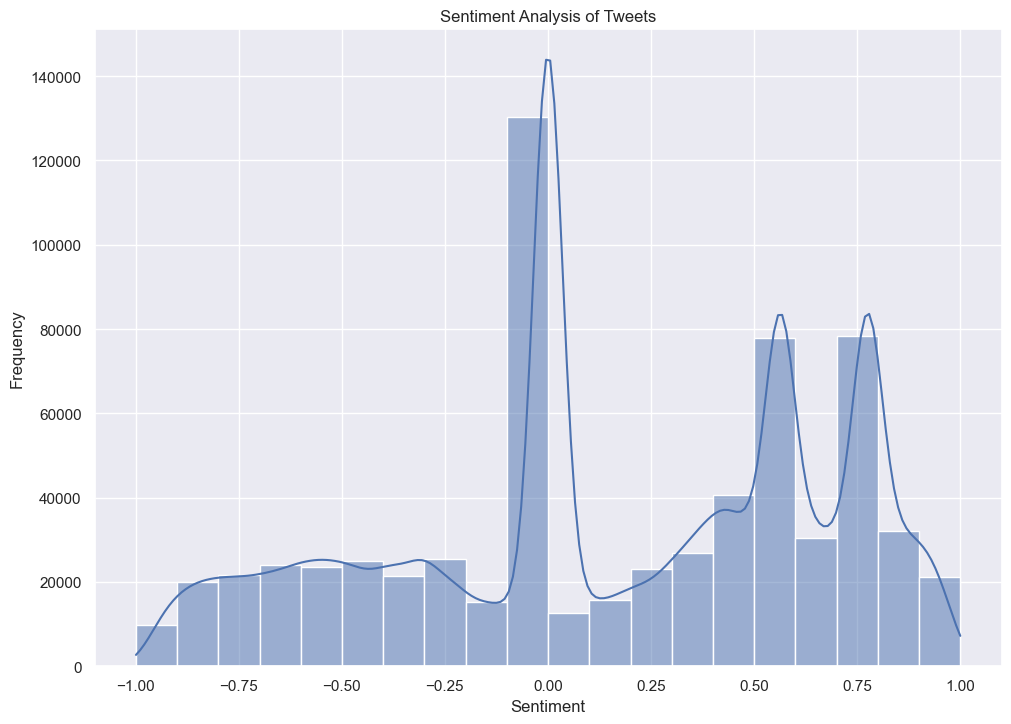

In [2]:
sentiment_df= pd.read_csv('./data/sentiment.csv')
#visualize the sentiment distribution
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(sentiment_df['compound'], bins=20, kde=True)
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [3]:
# group by user location and then by date and make mean of compound
grouped = sentiment_df.groupby(['UserLocation', 'TweetDate']).mean()

# get user locations 
locations = ['Chicago', 'New York', 'Los Angeles', 'Washington', 'London', 'Boston', 'Singapore', 'Rome', 'Seattle','Beijing, China','Hong Kong', 'Leeds, England','Manila, Philippines','Stockholm, Sweden', 'Melbourne, Victoria','Mumbai']

new_grouped_locations = grouped.loc[locations]

Sentiment per city for whole time period available in Covid-19 dataset

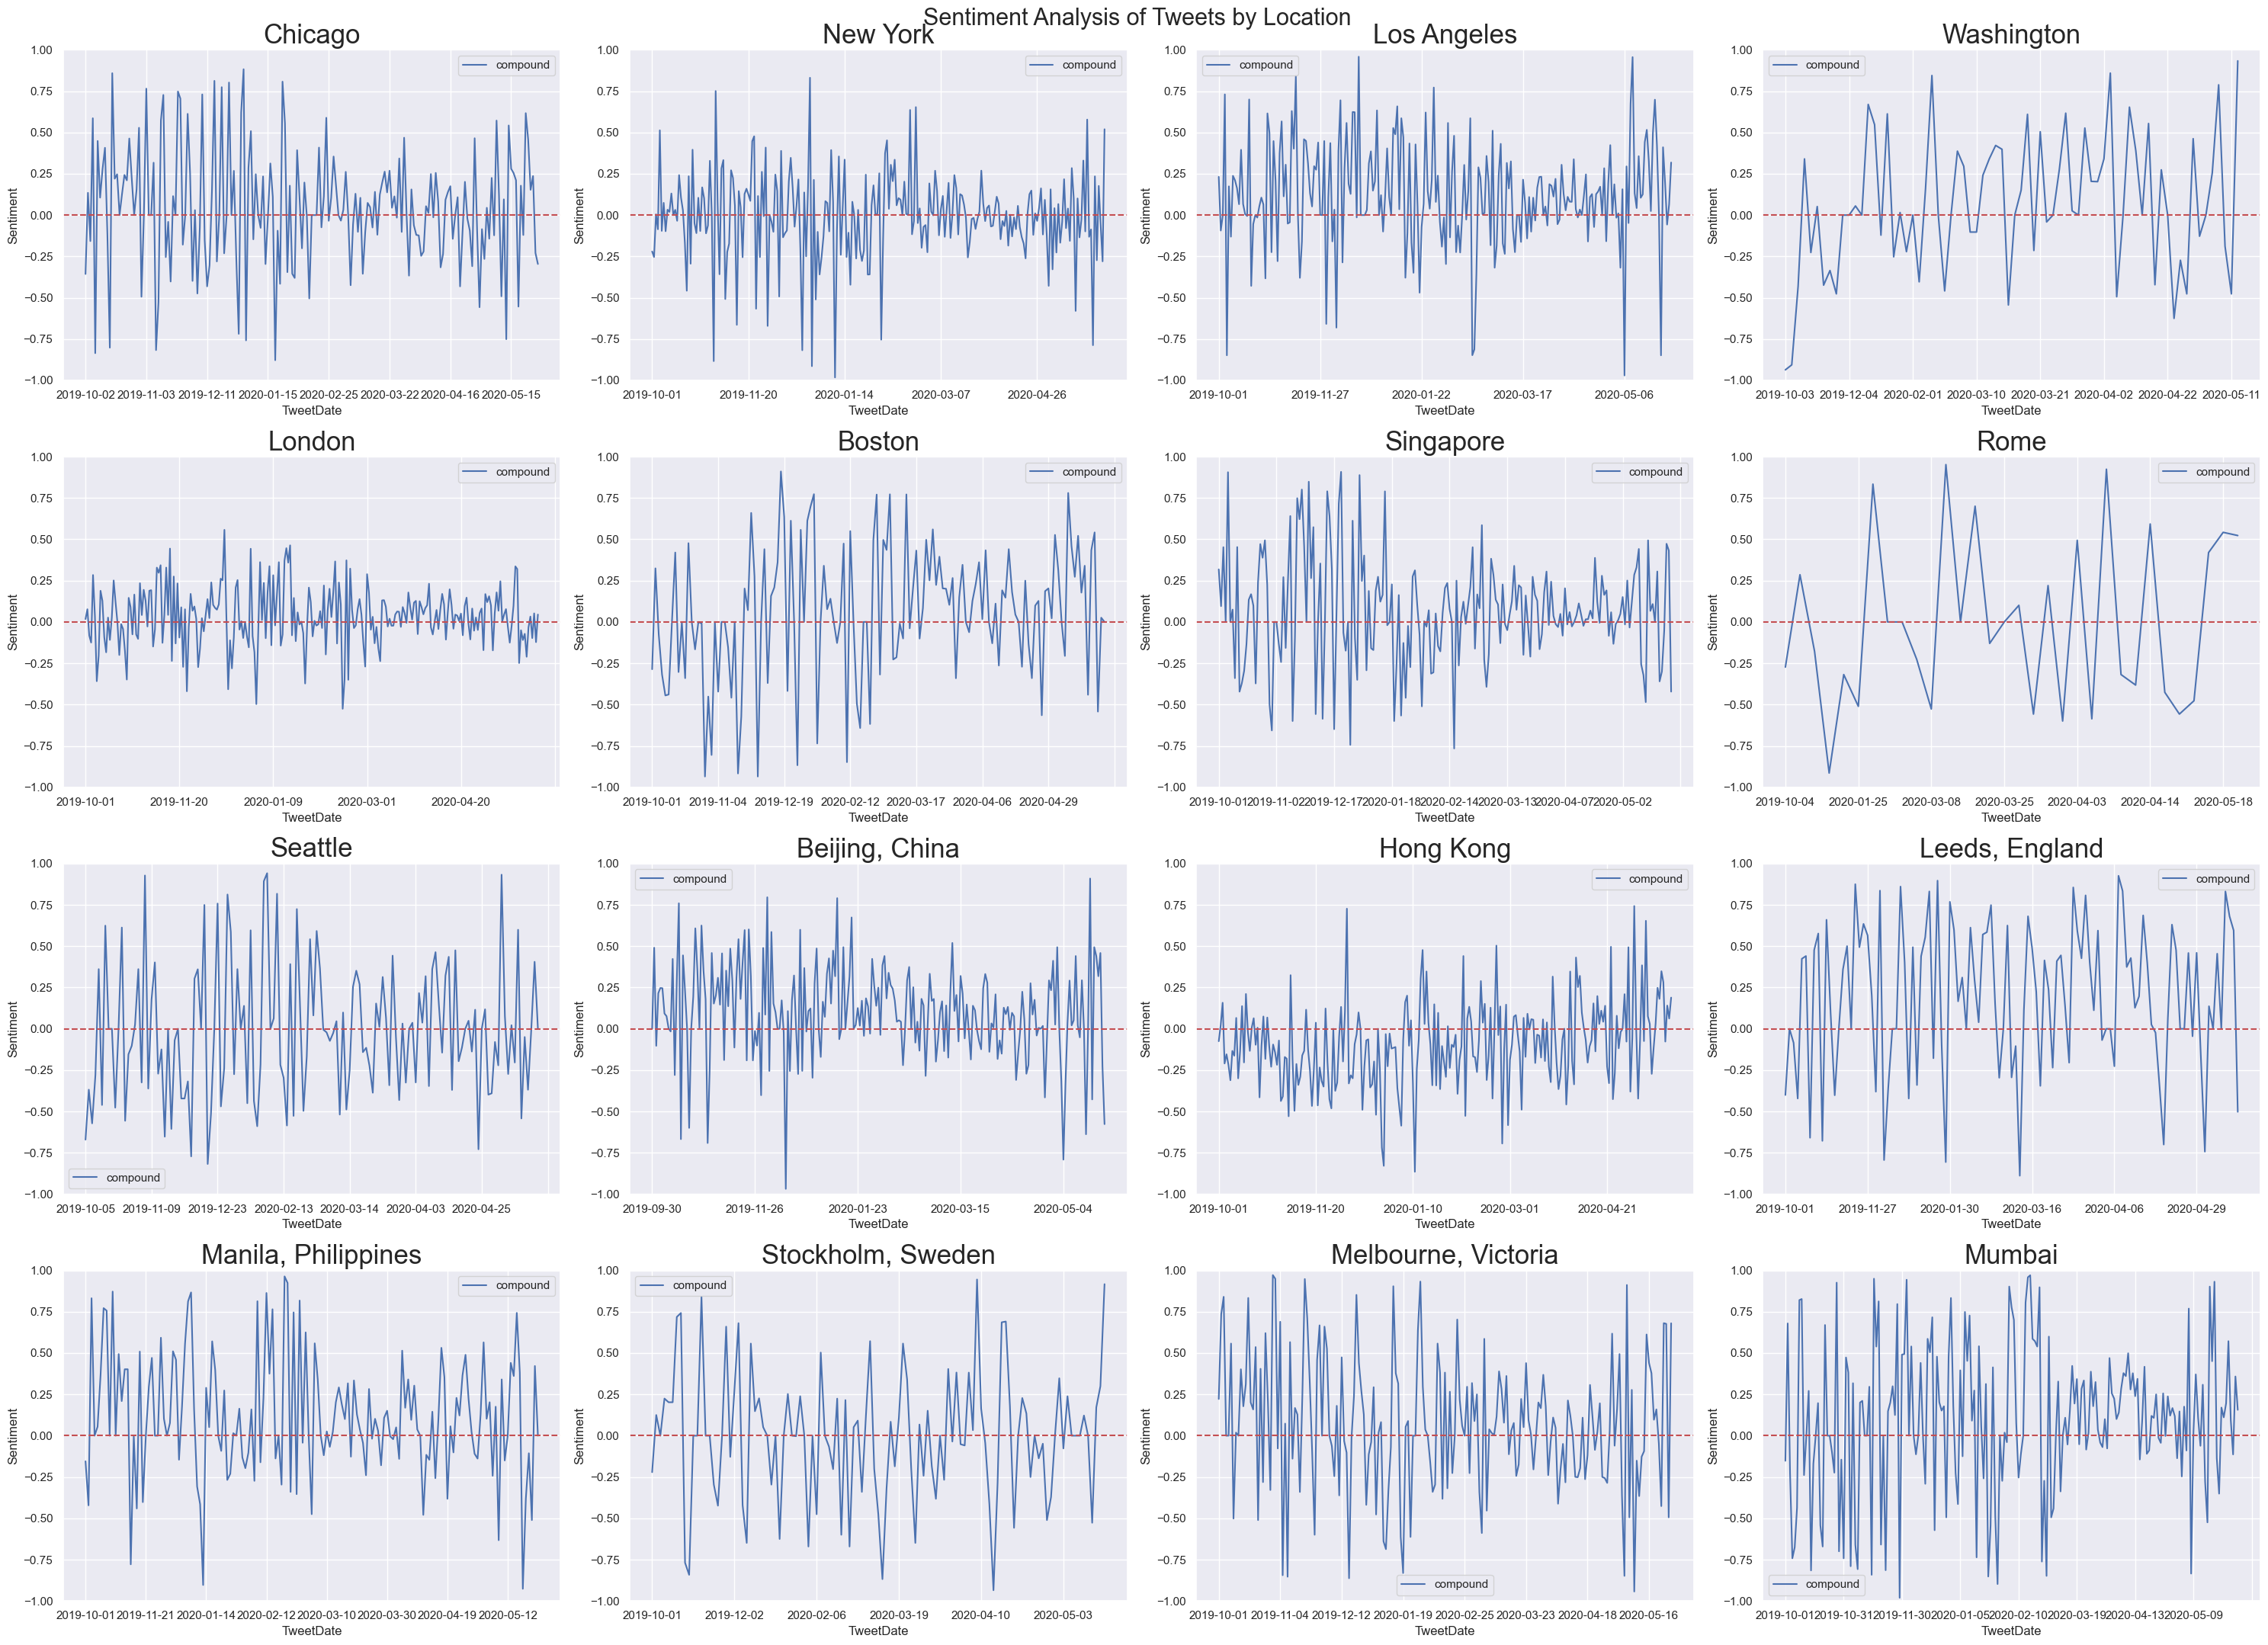

In [4]:
# sub plot of all sentiments for each location and set x axis to date

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 22))
fig.suptitle('Sentiment Analysis of Tweets by Location', fontsize=22)
for i in range(4):
    for j in range(4):
        new_grouped_locations.loc[locations[i*4+j]].plot(ax=axes[i,j], title=locations[i*4+j])
        
                

# y axis is sentiment with range -1 to 1 and red line is neutral sentiment
for ax in axes.flat:
    ax.set(ylabel='Sentiment', ylim=(-1, 1))
    ax.axhline(y=0, color='r', linestyle='--')
    ax.title.set_size(25)
    
plt.tight_layout()    
plt.show()

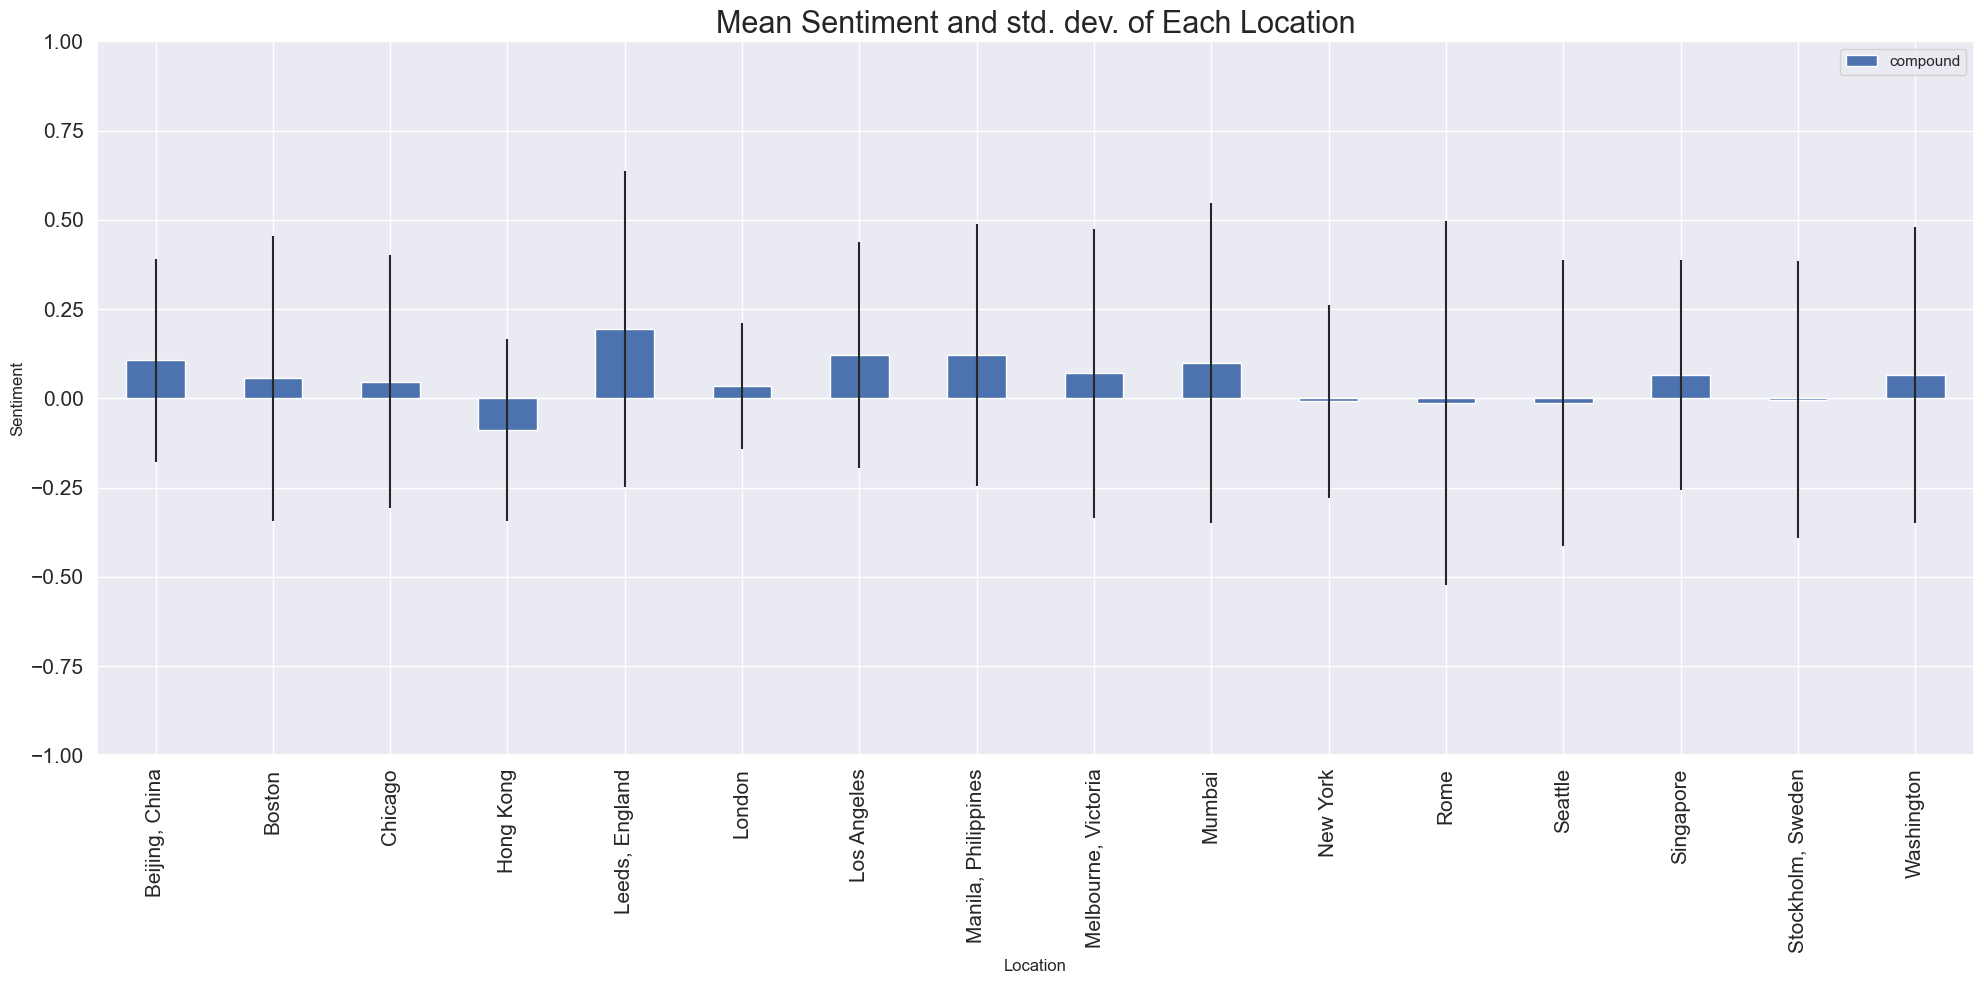

In [5]:
# make mean sentiment of each location
mean_sentiment = new_grouped_locations.groupby('UserLocation').mean()


#plot mean sentiment and variance of each location

mean_sentiment.plot(kind='bar', figsize=(20, 10), title='Mean Sentiment and std. dev. of each Location', fontsize=15,ylabel='Sentiment', ylim=(-1, 1), xlabel='Location', yerr= new_grouped_locations.groupby('UserLocation').std())

plt.title('Mean Sentiment and std. dev. of Each Location', fontsize=22)
plt.tight_layout()    
plt.show()

#### Explain what conclusions can be drawn from these, as well as key takeaways which answer (or partially answer) your research question

Looking at our first plot, one can clearly see that the overall sentiment has a maximum frequency roughly around the neutral sentiment. This is surprising because our data is collected using COVID 19 related topics and one would expect that the overall sentiment is rather negative. Moreover, one can see that the overall sentiment is rather positive than negative, due to two high peaks with clearly positive compound values which is also surprising. However, one can see that the overall sentiment is rather close to neutral, which is why we can conclude that the overall sentiment is rather neutral. 

Looking at our second plot, we can observe wild fluctuations in the sentiment compound score over time for the different cities. However, one can see that the sentiment compound score is rather close to neutral for all cities, which is why we can conclude that the overall sentiment is rather neutral for all cities. 

Moreover, looking at different cities one can observe differences across the different cities in terms of variance of sentiment over time. On the contrary, one has to point out that not for every city equally much data is available, which is why the variance of sentiment over time may be biased. 

Looking at our barplot, we see the mean sentiment compound score for the different cities. One can conclude that the mean sentiment compound score is often close to neutral for all cities and slightly biased towards positive sentiments. Nevertheless, we see both large differences in the mean sentiment compound score for the different cities as well as large standard deviations. This is surprising because one would expect that the mean sentiment compound score is rather similar for all cities due to the fact that a pandemic is a global phenomenon. 

Regarding our research question, we can conclude that fluctuations in sentiment across different cities can vary a lot. For example, looking at London one can see that the sentiment is rather stable over time, whereas looking at New York one can see that the sentiment fluctuates a lot. However, one has to point out that not for every city equally much data is available, which is why the variance of sentiment over time may be biased as mentioned before. 

What is more, one can observe an overall trend of a an increasingly relaxed and neutral sentiment during beginning of march until end of april in 2020. This is surprising because according to Zhirui Yao et al. at that time the pandemic was at its peak and one would expect that the sentiment is rather negative. During this month the WHO declared the COVID-19 outbreak a pandemic and the number of cases increased rapidly. Furthermore, during that time stricter measures were implemented in many countries, which is why one would expect that the sentiment is rather negative (Zhirui Yao et al., "Comparing tweet sentiments in megacities using machine learning techniques: In the midst of COVID-19", 2021). 

As a result, one can interpret that uncertainty can lead to a negative sentiment in the population whereas strict measures can lead to a more neutral sentiment even though the pandemic is at its peak or even getting worse. This is quite counterintuitive and surprising, which is why further research is needed to understand the underlying mechanisms.

### Q4: Comparison to literature

### Plot and analyze the sentiment of the Tweets as a function of time per city

In [6]:
# load sentiment_df
sentiment_df = pd.read_csv('./data/sentiment.csv')

# group by user location and then by date and make mean of compound
grouped = sentiment_df.groupby(['UserLocation', 'TweetDate']).mean()

# get user locations of grouped 
locations = [ 'New York','London','Los Angeles','Chicago',  'Washington','Seattle',  'Boston', 'Singapore', 'Rome', ]

new_grouped_locations = grouped.loc[locations]


### Plots for date between 2020-03-01 and 2020-05-21 (like in the paper)

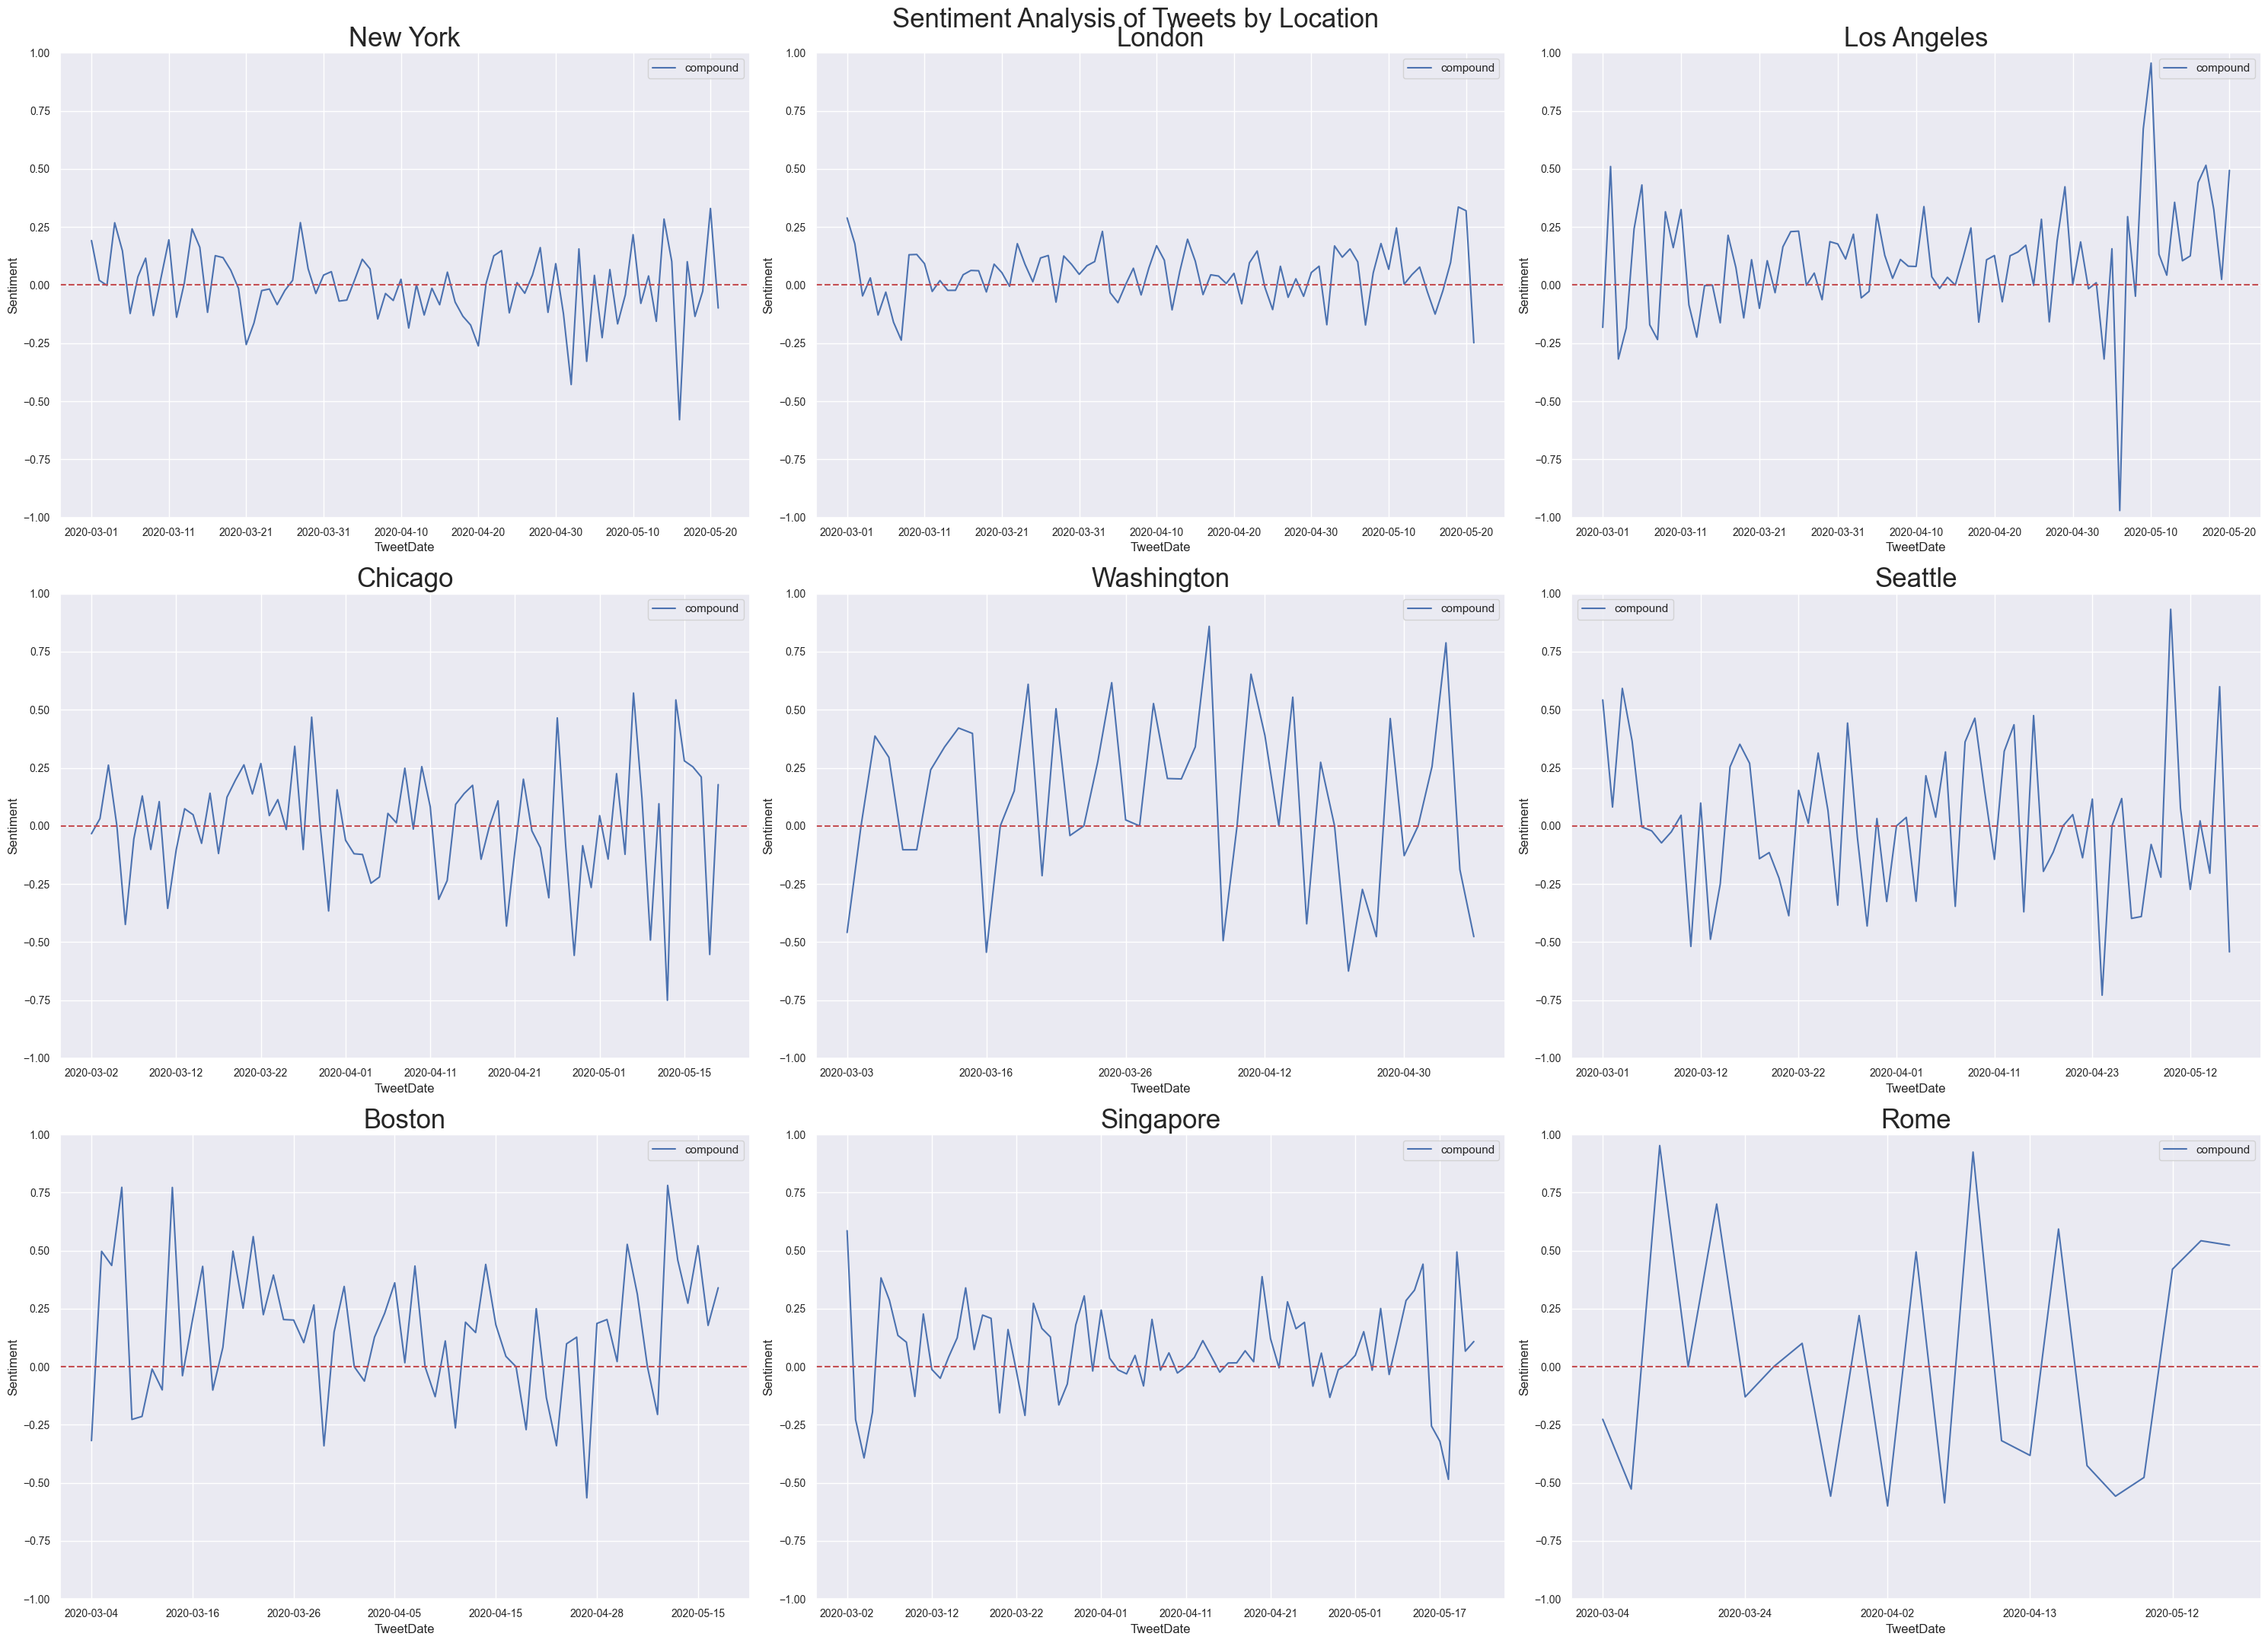

In [7]:
# get values between 2020-03-01 and 2020-05-21
new_grouped_locations = new_grouped_locations.loc[(new_grouped_locations.index.get_level_values('TweetDate') >= '2020-03-01') & (new_grouped_locations.index.get_level_values('TweetDate') <= '2020-05-21')]

# make each a sub plot of all sentiments for each location and set x axis to date

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 22))
fig.suptitle('Sentiment Analysis of Tweets by Location', fontsize=25)
for i in range(3):
    for j in range(3):
         new_grouped_locations.loc[locations[i*3+j]].plot(ax=axes[i,j], title=locations[i*3+j], fontsize=10)
                        

# y axis is sentiment with range -1 to 1 and red line is neutral sentiment
for ax in axes.flat:
    ax.set(ylabel='Sentiment', ylim=(-1, 1))
    ax.axhline(y=0, color='r', linestyle='--')
    ax.title.set_size(25)
    
plt.tight_layout()
plt.show()

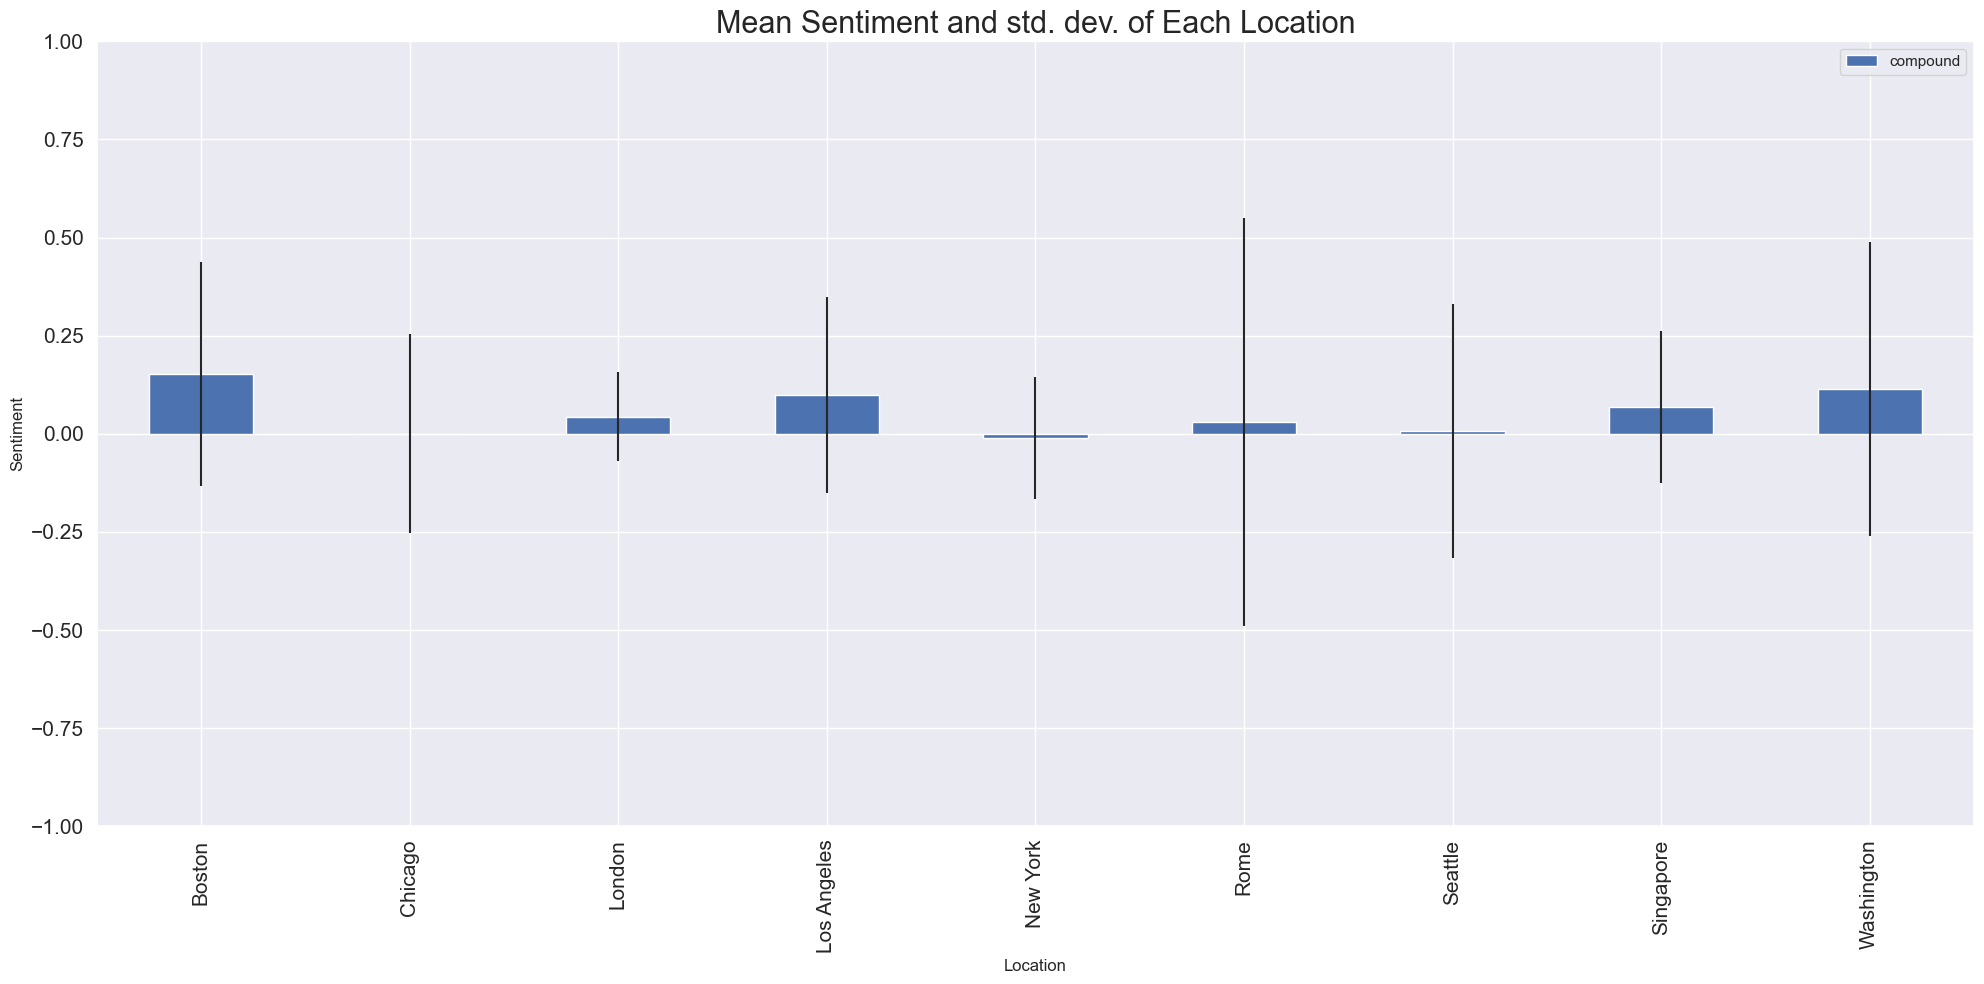

In [8]:
# make mean sentiment of each location
mean_sentiment = new_grouped_locations.groupby('UserLocation').mean()


#plot mean sentiment and variance of each location

mean_sentiment.plot(kind='bar', figsize=(20, 10), title='Mean Sentiment and std. dev. of Each Location', fontsize=15,ylabel='Sentiment', ylim=(-1, 1), xlabel='Location', yerr= new_grouped_locations.groupby('UserLocation').std())

plt.title('Mean Sentiment and std. dev. of Each Location', fontsize=22)
plt.tight_layout()    
plt.show()

#### Discuss whether your results support or disagree with the paper you have chosen for inspiration. Provide plausible reasons for different findings or any performance discrepancies


Our results support the findings of Zhirui Yao et al. in terms of that positive sentiment Tweets from big cities were positively correlated with stricter quarantine measures. In our barplot one can clearly see this correlation during the time period between 2020-03-01 and 2020-05-21. Compared to our barplot using the whole time period available in the Covid-19 dataset, one can see that sentiments are now strictly positive or neutral. One has to point out, that this is during the time of when COVID cases were at its peak and restrictions started to be implemented as described before. 

On the contrary, we could not find this strong correlation in the cities of New York and London as Zhirui Yao et al. did. In our barplot one can see that the mean sentiment compound score is rather close to neutral/ slightly positive for both cities. This might be due to usage of different datasets (in Zhirui Yao et al. case: combination of the Sentiment140 dataset and the Twitter Sentiment Corpus by Sanders (2011)) or different methods applied (we use VADER sentiment analysis tool, whereas Zhirui Yao et al. use a machine learning approach). 

Nevertheless, we can come to the same conclusion as Zhirui Yao et al. in terms of that stricter quarantine measures lead to a more positive sentiment in the population. As a result, one can interpret our findings as well as the findings of Zhirui Yao et al. as that the Twitter sentiment is more sensitive to COVID restrictions than to the number of COVID cases. This is again quite counterintuitive and surprising, which is why further research is needed to understand the underlying mechanisms.

One possible explanation for this might be that in highly populated megacities people are rather depend on sufficient and effective measures to protect themselves from the virus as they are more exposed to people (eg.: public transportation, supermarkets etc.). This can be an explanation why people are more likely to be positive about stricter quarantine measures than in high populated cities (Zhirui Yao et al., "Comparing tweet sentiments in megacities using machine learning techniques: In the midst of COVID-19", 2021).

### Q5: Discussion
Discuss the pros and cons of your approach compared to the one
used in the paper

Our approach has several advantages compared to the one used in the paper. First of all, our approach is more robust in terms of that it does not require any training data. This is due to the fact that we use the VADER sentiment analysis tool, which is already fimiliar with a large corpus of social media texts. Furthermore, our approach is more robust in terms of that it provides robust classification results irrespective of the length of the text. This is due to the fact that we use the VADER sentiment analysis tool, which is specifically designed to analyze social media texts. Moreover, VADER does not require many computational resources, which is why it is very efficient and fast. Additionally, VADER is very easy to use, user friendly and does not require a lot many preprocessing steps. In the paper, the applied models were not able to process effects of slang and emojis which surely would imrove the results.

On the contrary, our approach has a few disadvantages compared to the one used in the paper. First of all, our approach is less flexible in terms of that it is not possible to adjust the sentiment analysis tool to the specific domain of the text. This is due to the fact that we use the VADER sentiment analysis tool, which is specifically designed to analyze social media texts. What is more, our approach is less flexible in terms of that it is not possible to adjust the sentiment analysis tool to the specific language of the text. In this case, VADER is specifically designed to analyze English texts. 

### Q6: Summary & Conclusion 
 Provide a summary of your analysis and the insights it
provides about your research question

As a summary one can say that the overall sentiment is rather neutral for all cities. However, one can observe wild fluctuations in the sentiment compound score over time for the different cities. Moreover, one can observe an overall trend of a an increasingly relaxed and neutral sentiment during beginning of march until end of april in 2020. This is surprising because according to Zhirui Yao et al. at that time the pandemic was at its peak and one would expect that the sentiment is rather negative. During this month the WHO declared the COVID-19 outbreak a pandemic and the number of cases increased rapidly. Furthermore, during that time stricter measures were implemented in many countries, which is why one would expect that the sentiment is rather negative (Zhirui Yao et al., "Comparing tweet sentiments in megacities using machine learning techniques: In the midst of COVID-19", 2021).

As possible explanation for this might be that in highly populated megacities people are rather depend on sufficient and effective measures to protect themselves from the virus as they are more exposed to people (eg.: public transportation, supermarkets etc.). This can be an explanation why people are more likely to be positive about stricter quarantine measures than in high populated cities (Zhirui Yao et al., "Comparing tweet sentiments in megacities using machine learning techniques: In the midst of COVID-19", 2021).

Concluding, one can say that the Twitter sentiment is more sensitive to COVID restrictions than to the number of COVID cases. This is quite counterintuitive and surprising, which is why further research is needed to understand the underlying mechanisms.